#### This notebook we will work in DecisionTreeClassifier


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV

%matplotlib inline
SEED = 42

In [97]:
# Read processe file
df = pd.read_csv('../data/processed_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,...,8,19,4,50,2020,4,1,2014,8,3
1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,...,11,22,47,46,2029,9,1,2014,8,3
4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3


#### Lets separate Level and features, Scaled features


In [98]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 34 columns):
accountNumber                    633846 non-null int64
acqCountry                       633846 non-null int64
availableMoney                   633846 non-null float64
cardCVV                          633846 non-null int64
cardLast4Digits                  633846 non-null int64
cardPresent                      633846 non-null int64
creditLimit                      633846 non-null float64
currentBalance                   633846 non-null float64
customerId                       633846 non-null int64
enteredCVV                       633846 non-null int64
expirationDateKeyInMatch         633846 non-null int64
isFraud                          633846 non-null int64
merchantCategoryCode             633846 non-null int64
merchantCountryCode              633846 non-null int64
merchantName                     633846 non-null int64
posConditionCode                 633846 non-null int64
pos

#### Split data into train test 
 We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create a DessionTree classifier and fit the model and report accuracy

In [101]:
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),5)
precision = round(precision_score(y_test, y_pred),5)
recall = round(recall_score(y_test, y_pred),5)
print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))

acc: 0.98262 precision: 0.86957 recal: 0.00602


#### Cross validation
To eliminate over-fitting, we can apply cross-validation. we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that one.

Text(0.5,1,'Average score: 0.9829408686966208')

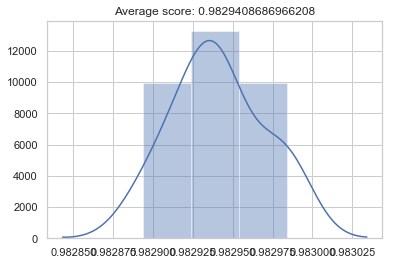

In [104]:
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=SEED)

cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

It looks there is no improvement using cross-validation. it seems like we are not suffering from overfit

#### Parameter Tuning

In classification technique, there are some parameters that can be tuned to optimize the classification. 
In DecessionTreeClassifier we can tune 

- Decision tree is max depth (the depth of the tree)
- max feature (the feature used to classify)
- criterion
- splitter

Grid Search explores a range of parameters and finds the best combination of parameters. Then repeat the process several times until the best parameters are discovered. 
lets use grid search to get best params


In [105]:
from sklearn.model_selection import StratifiedKFold

dt_classifier = DecisionTreeClassifier()

parameter_grid = {
                  'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [3, 4, 5, 6],
                  'max_features': [15, 20, 25, 30]
                 }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dt_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dt_classifier = grid_search.best_estimator_
best_dt_classifier

Best score: 0.982994960365098
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 20, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

A little bit improvement in best score. lets fit best model


In [115]:
best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred),5)
precision = round(precision_score(y_test, y_pred, zero_division=1),5)
recall = round(recall_score(y_test, y_pred),5)
print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))


acc: 0.98253 precision: 1.0 recal: 0.0


#### Save best model 

In [118]:
import pickle

lookup ={
    1 : 'Fraud', 0:'Not Fraud'
}

pickle.dump(best_dt_classifier, open('../saved_models/dtc_model.pkl','wb'))
model = pickle.load(open('../saved_models/dtc_model.pkl','rb'))

#test the model 
pred = model.predict([X_test[0]])
lookup[pred[0]]

'Not Fraud'

#### lets write score in a file

In [119]:
import csv

with open('../data/dtc_scrore.csv', 'w', newline='') as csvfile:
    fieldnames = ['accuracy_score', 'precision_score', 'recall_score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerow({'accuracy_score': accuracy, 'precision_score':  precision, 'recall_score':recall})


#### Code Reference

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://medium.com/@haydar_ai/learning-data-science-day-22-cross-validation-and-parameter-tuning-b14bcbc6b012
-  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html